#**B455 : Project 2**


> (3/3/2020) Serena Patel

> The objective of this project is to utilize the CIFAR10 dataset to create a Deep Neural Network model that classifies input color images into one of ten classes. The project will include one baseline DNN model and two additional models with improved performace. Improved performace incldues changes in number of layers, different activation functions, changes in the number of neurons in each layer, etc. Also, the optimizer utilized, the number of neurons in the output layer, the loss function applied, and the input features utilized must be detailed. 

> Grading will be based on performance (accuracy) on the testing set of the baseline DNN model and the two other models. Accuracy is calculated with:

      number of correctly classified images / total number of images


>classes:
  1. airplane
  2. automobile
  3. bird
  4. cat
  5. deer
  6. dog
  7. frog
  8. horse
  9. ship
  10. truck

Training set: 50,000 32x32 images

Testing data: 10,000 images


# **Data Analysis**

**Deep Neural Network**

A deep neural network, or DNN, is a neural network with more than one hidden layer. A DNN is a general term, so to implement our analysis and classification, we have to use variants of a deep neural network. 

**CNN**

A CNN, or Convolutional Neural Network is a type of deep neural network whose input is specific to images, and therefore more applicable to this dataset. 

"A convolution multiplies a matrix of pixels with a filter matrix or ‘kernel’ and sums up the multiplication values. Then the convolution slides over to the next pixel and repeats the same process until all the image pixels have been covered." (Building a Convolutional Neural Network in Keras)

**Activation Function Analysis**

To find the right activation function, we have to consider our options. In particular, the sigmoid function and the ReLU function.

>*The Sigmoid Function*
This function is utilized to caputre non-linearity in the data and is used to find weights of differetn layer with gradient descent and backpropogration. It does assume that the independent variables have a Gaussian distribution, an indication of randomly occurring events with a good starting generic distribution.
The output range is [0,1], and there are problems with that. As the number of layers increases with a large input data set, the range is not affected as much it should be to show change. This can be problematic.

   $\sigma$(z) = $\frac{1}{1+e^{-x}}$

 
>*The ReLU Function*
The Rectified Linear Unity function is a deep learning activation function that "returns 0 if it recieves any negative input, but for any positive value x, it returns that value back."(Understanding Nueral Networks)

Since it is influence by all x values, the ReLU function gives us more complete information, and performs better than the sigmoid function. 




# Keras Implementation
Building a network based on the CNN model & the code from the project 2 class slides that detail a DNN model

# import the data

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


(32, 32, 3)

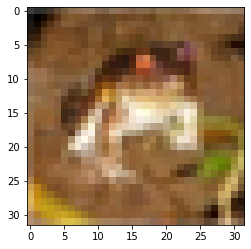

In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

#load dataset
from keras.datasets import cifar10
(trainX, trainY), (testX, testY) = cifar10.load_data()
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

plt.imshow(trainX[0])
trainX[0].shape



# normalize the data

> Our data is normalized by dividing each value by the maximum color value, 255, to classify the normalcy of color values. 

In [0]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

# baseline model

> In this model, we utilize the ReLU activation function with a singular base layer. I utilized 32 because it is the basic size of the image.



In [5]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)

# evaluate model
accuracy = model.evaluate(testX, testY, verbose=1)
print('Accuracy: ''> %.3f' % (accuracy * 100.0))

10000/10000 [==============================] - 1s 83us/step
Accuracy: 0.1


# Model 2

> In this model, the improvement made was the addidtion of the convolutional layer that doubles the initial dimensionality from 32 to 64. This allows the number of output filters in the convolution to be doubled from the previous model. 

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)

# evaluate model
accuracy = model.evaluate(testX, testY, verbose=1)
print('Accuracy: ''> %.3f' % (accuracy * 100.0))

10000/10000 [==============================] - 1s 87us/step
Accuracy: 0.1


# Model 3
>In this model, the improvement made was the addidtion of the convolutional layer that triple the initial dimensionality from 32 to 128. This allows the number of output filters in the convolution to be tripled from the original model. 

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)

# evaluate model
accuracy = model.evaluate(testX, testY, verbose=1)
print('Accuracy: ''> %.3f' % (accuracy * 100.0))

# Conclusion

Our data provides us with images that are scanned, data points are extracted and classified. Since we have 10 categories, the output layer has 10 nodes. We found that our images are square 32 x 32 images, we also found that it has 3 different channels. We utilize the value of 32 to build the shapes of our images. After loading our data, we normalize it by converting our values to floats and dividing each value by the maximum, which is 255. 255 is the value of a full color pixel. We then are able to implement our models. Our first model is our baseline model. Inspired by the Keras Documenation on CNN example, I created a model that utilizes three layers of our Conv2D layers. Where the the number of output filters in the convolution is 32, 64, and 128. With each new DNN, we added a new layer. The model defines the feature detector along with the functionality to interpret the features and make predictions of classification based on those features. A ReLU activation function was used because it is more effiecient than a standard sigmoid function. The optimizer function utilized is the SGD, Stochastic gradient descent. This is a variation of the gradient descent that updates for each training data point. This allows for a more accurate reading for each data point.
The optimizer loss function utilized was the categorical cross entropy because we have multiple classes to consider to help watch the accuracy of our classification. 
The accuracies approximated are 10 or above, allowing it to be better than random guessing. 





#References

1. [Your First Deep Learning Project in Python with Keras Step-by-Step](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)

2. [How to Configure the Number of Layers and Nodes in a Neural Network](https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/)

3. [ReLU Introduction](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)

4. [Understanding Neural Networks](https://towardsdatascience.com/understanding-neural-networks-from-neuron-to-rnn-cnn-and-deep-learning-cd88e90e0a90)

5. [Building a Convolutional Neural Network in Keras](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5)

6. [Keras Documenation CNN](https://keras.io/examples/cifar10_cnn/)